In [1]:
import os
os.chdir("C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\AP\\Spectral_demixing\\notebooks\\PIPELINE") #change directory to access PIPELINE modules

import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import Step1_h5_import as image_import
import Step2_image_radiance as image_rad

In [2]:
#Define input folder

data_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_checker_highgain\\1_17"

#define output folder
base_data_folder = "HDR_output"

#Find any folder that has the desired coefficients
coefficients_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\250103_coefficients"

experiment_title = 'checker_highgain'

#load parameters
param = image_import.load_parameters(coefficients_directory)

#import and process raw data, save to .npy
image_import.process_and_save(data_directory, experiment_title, base_data_folder, operations=['clip', 'denoise'], params=param)

# Generate import report
#image_import.generate_import_report(data_directory, experiment_title, param, base_data_folder, operations=['clip', 'denoise'])

print("Processing complete.")

Processing checker_highgain_670_BP1550 - Shape: (7, 640, 512), Exposure times: [0.001 0.002 0.004 0.008 0.016 0.032 0.064]
Used filter set based on date 2024/12/17 13:08:48.376
Final shape of image array for checker_highgain_670_BP1550: (7,), dtype: [('exposure_time', '<f8'), ('image', '<f8', (640, 512))]
Processing checker_highgain_670_BP1550 - Shape: (7, 640, 512), Exposure times: [0.001 0.002 0.004 0.008 0.016 0.032 0.064]
Used filter set based on date 2024/12/17 13:08:49.533
Final shape of image array for checker_highgain_670_BP1550: (7,), dtype: [('exposure_time', '<f8'), ('image', '<f8', (640, 512))]
Processing checker_highgain_670_BP1550 - Shape: (7, 640, 512), Exposure times: [0.001 0.002 0.004 0.008 0.016 0.032 0.064]
Used filter set based on date 2024/12/17 13:08:50.713
Final shape of image array for checker_highgain_670_BP1550: (7,), dtype: [('exposure_time', '<f8'), ('image', '<f8', (640, 512))]
Processing checker_highgain_670_BP1550 - Shape: (7, 640, 512), Exposure times: 

In [3]:
#use the created CRF to perform image fusion for the remaining exposures
import Step2_image_radiance as image_rad

data_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_checker_highgain\\1_17"

#define output folder
base_data_folder = "HDR_output"
#Find any folder that has the desired coefficients
coefficients_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\250103_coefficients"

experiment_title = 'checker_highgain'


#load parameters
param = image_import.load_parameters(coefficients_directory)

processed_data =image_rad.process_hdr_images(data_directory, experiment_title, base_data_folder, param,response_curve= None,smoothing_lambda=1000,num_sets=None,weighting_function=image_rad.debevec_weight)


7 18448
z_max:  4578.7358598154715 z_min:  0 z_mid:  2289
138290 138292


MemoryError: 

In [34]:
data_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_checker_highgain"
image_rad.generate_multi_page_report(processed_data, data_directory, experiment_title, image_rad.broadhat_weight, base_data_folder)

Debug: intensity_samples shape: (18448, 7)
Debug: log_exposures shape: (18448, 7)
Debug: response_curve shape: (4579,)
Debug: z_min: 0, z_max: 4578.7358598154715
plot_log_log_crf - pixel_values shape: (4579,), response_curve shape: (4579,)


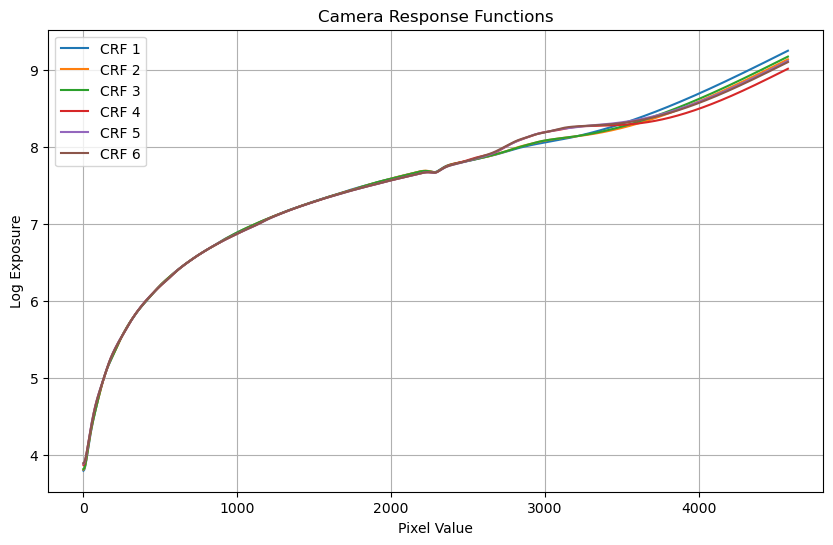

In [37]:
#Import CRF data from folder
data_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_checker_highgain\\7-exposure CRFs"
#load all .npy files in folder
crf_files = [f for f in os.listdir(data_directory) if f.endswith('.npy')]

crf_array = np.array([np.load(os.path.join(data_directory, file)) for file in crf_files])

#plot the CRFs
plt.figure(figsize=(10, 6))
for i in range(crf_array.shape[0]):
    plt.plot(crf_array[i], label=f'CRF {i+1}')

plt.xlabel('Pixel Value')
plt.ylabel('Log Exposure')
plt.legend()
plt.grid(True)
plt.title('Camera Response Functions')
plt.show()

In [ ]:
#Obtain a weighting function from CRF using Mitsunaga/Nayar method
import Step2_image_radiance as image_rad

data_directory = "C:\\Users\\apate\\OneDrive - Northeastern University\\Dennis Lab site\\Image processing\\IR VIVO data\\AP\\241217_checker_highgain\\7-exposure CRFs"

#load CRF
crf = np.load(os.path.join(data_directory, ''))

#obtain weighting function by taking derivative of CRF
weighting_function = image_rad.mitsunaga_weight(crf)